# Example 4: Magnetic parameters mapped over the grid

The last example showed how to estimate the parameters at a single grid cell using either the `L2` or `bayes` estimation approaches. We also attempted to fix the parameter `beta` and estimate the depth parameters for the buried magnetic model. We are now in a position to estimate the parameters of the model over the entire grid.

In [1]:
import numpy as np
import pandas as pd
from platecurie import MagGrid, Project

xmin, xmax, ymin, ymax, zmin, zmax, dx, dy, nx, ny = \
pd.read_csv('../data/Mag_NWCAN.xyz', sep='\t', nrows=0).columns[1:].values.astype(float)
nx = int(nx); ny = int(ny)

magdata = pd.read_csv('../data/Mag_NWCAN.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]

magdata[magdata<-750] = np.nan
magdata[magdata>1000] = np.nan

# Load the data into a MagGrid object
mag = MagGrid(magdata, dx, dy)

# Generate a mask
mask = (magdata==0)

# Load the grid into a Project object and initialize it
project = Project(grids=[mag])
project.init()

# Store mask as attribute
project.mask = mask

grid contains NaN values. Performing interpolation...
Wavelet scalogram 
Initialization: success


At this point the project has been initialized with the `L2` inverse approach and the scalogram has been calculated. The `L2` method is **MUCH** faster than the `'bayes'` approach and allows us to calculate model parameters efficiently and rapidly and do this for every grid cell on the map. It is also possible to perform the analysis on a decimated grid, which speeds things up further.

In [2]:
# Estimate model parameters at every 10 points of the initial grid
project.estimate_grid(10)

Computing: [##########] 90/90


Once this is done, we can look at the results by plotting the maps using the method `plot_results()`. By default, if you simply type `project.plot_results()`, no plot will be generated. You can plot them all at the same time using `project.plot_results(mean_A=True, std_A=True, mean_zt=True, std_zt=True, mean_dz=True, std_dz=True, mean_beta=True, std_beta=True, chi2=True)`, but you will have very limited control over each plot. Instead we recommend calling one plot per map and add a few keyword arguments:

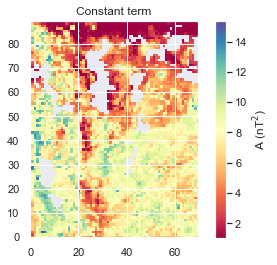

In [3]:
project.plot_results(mean_A=True, mask=True, cmap='Spectral')

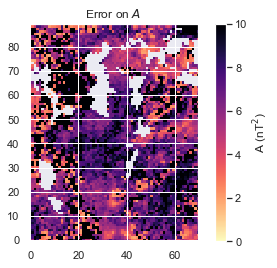

In [4]:
project.plot_results(std_A=True, mask=True, cmap='magma_r', vmin=0, vmax=10)

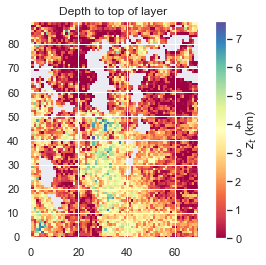

In [5]:
project.plot_results(mean_zt=True, mask=True, cmap='Spectral')

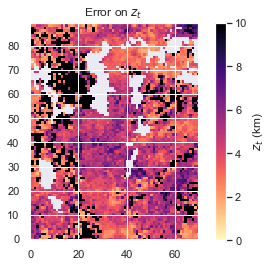

In [6]:
project.plot_results(std_zt=True, mask=True, cmap='magma_r', vmin=0, vmax=10)

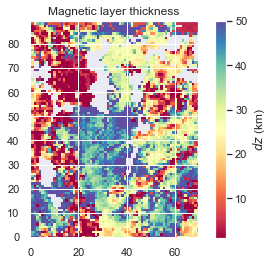

In [7]:
project.plot_results(mean_dz=True, mask=True, cmap='Spectral')

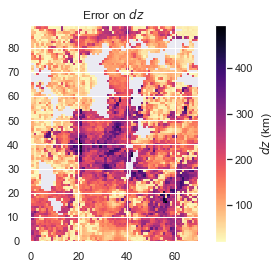

In [8]:
project.plot_results(std_dz=True, mask=True, cmap='magma_r')

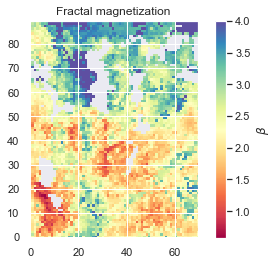

In [9]:
project.plot_results(mean_beta=True, mask=True, cmap='Spectral')

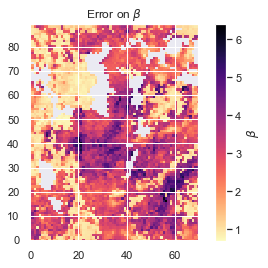

In [10]:
project.plot_results(std_beta=True, mask=True, cmap='magma_r')

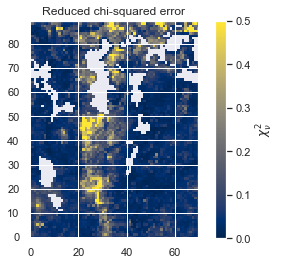

In [14]:
project.plot_results(chi2=True, mask=True, cmap='cividis', vmin=0, vmax=0.5)

Voilà! You have now estimated your first maps of effective magnetic thickness (`dz`), depth to the top of the buried layer (`zt`), magnetic intensity (`A`) and fractal parameter (`beta`) over the northwestern part of North America. 

Fixing the parameter `beta` will lead to results that can be compared with those of [Gaudreau et al., (2019)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2018JB016726). Remember, however, that Gaudreau et al. (2019) report values of `zb`, which is simply the sum of `zt` and `dz`. You could easily tweak the project object to plot `zb` by replacing the attribute `dz` by the sum of `zt` and `dz` thusly:

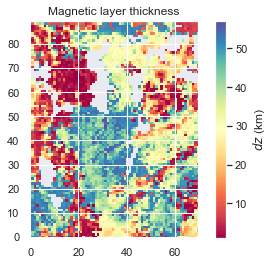

In [12]:
project.mean_dz_grid = project.mean_dz_grid + project.mean_zt_grid
project.plot_results(mean_dz=True, mask=True, cmap='Spectral')

In the final example, we will explore the effect of fixing `zt` using a priori estimates (with or without fixing `beta`).